In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest

In [2]:
data_wti = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil Market\Datasets\wti-daily_csv.csv', parse_dates=['Date'])
data_rents = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil Market\Datasets\Oil rents by country.csv', header=[2])
wti_last_month = pd.read_csv(r'C:\Users\USUARIO\Documents\GitHub\Oil-Gas-Projects\Oil Market\Datasets\DCOILWTICO.csv', parse_dates=['DATE'])

In [3]:
rents_ecu = data_rents[(data_rents['Country Name'] == 'Ecuador')].T

In [4]:
rents_ecu

,66
Country Name,Ecuador
Country Code,ECU
Indicator Name,Oil rents (% of GDP)
Indicator Code,NY.GDP.PETR.RT.ZS
1960,NaN
...,...
2018,7.166329
2019,6.610501
2020,4.394566
2021,NaN


<AxesSubplot:>

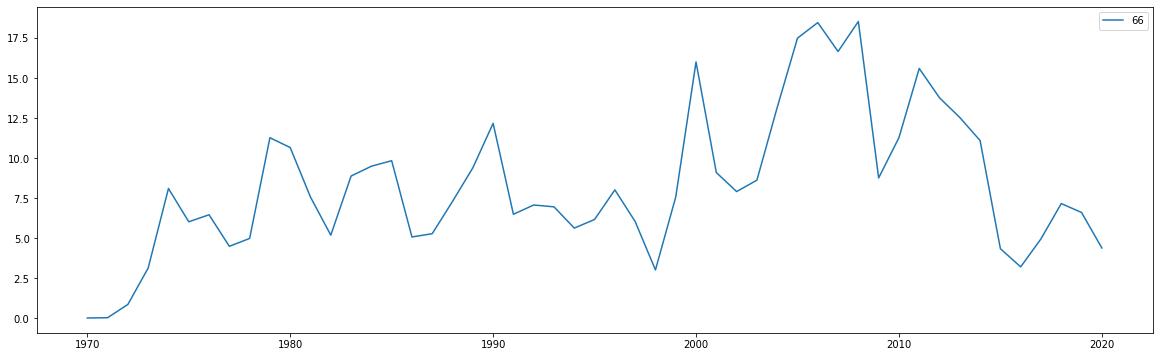

In [5]:
rents_ecu.iloc[14:-2].plot(figsize=(20,6))

In [6]:
data_wti.Date.describe()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19816\1887816428.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_wti.Date.describe()


count                    9232
unique                   9232
top       1986-01-02 00:00:00
freq                        1
first     1986-01-02 00:00:00
last      2022-08-22 00:00:00
Name: Date, dtype: object

In [7]:
data_wti.set_index('Date', inplace=True)

In [8]:
data_wti.head(3)

,Price
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53


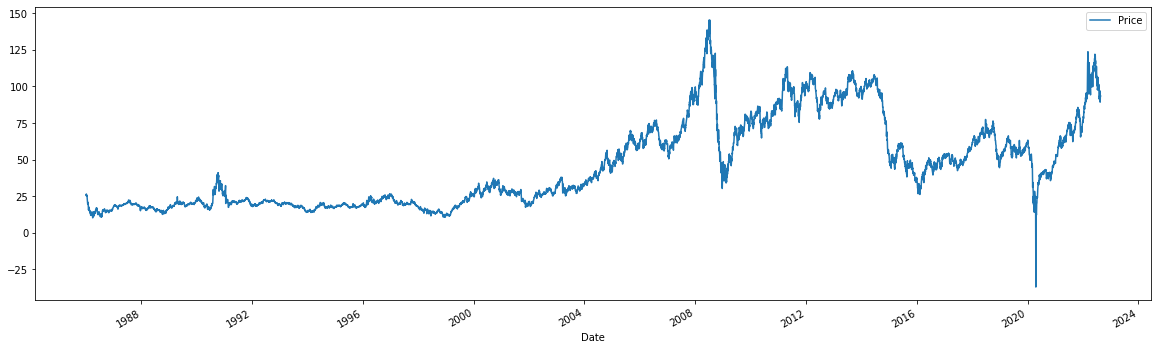

In [9]:
data_wti.plot(figsize=(20,6));

## Key Dates for Oil Industry

In [56]:
gulf_war = '1990-10-2'
attack_911 = '2001-9-11' 
fina_crisis = '2008-9-25'
peak_shale = '2014-6-20'
covid_19 = '2019-12-31'
war_rus_ukr = '2022-04-24'
train_date = '2022-08-22'

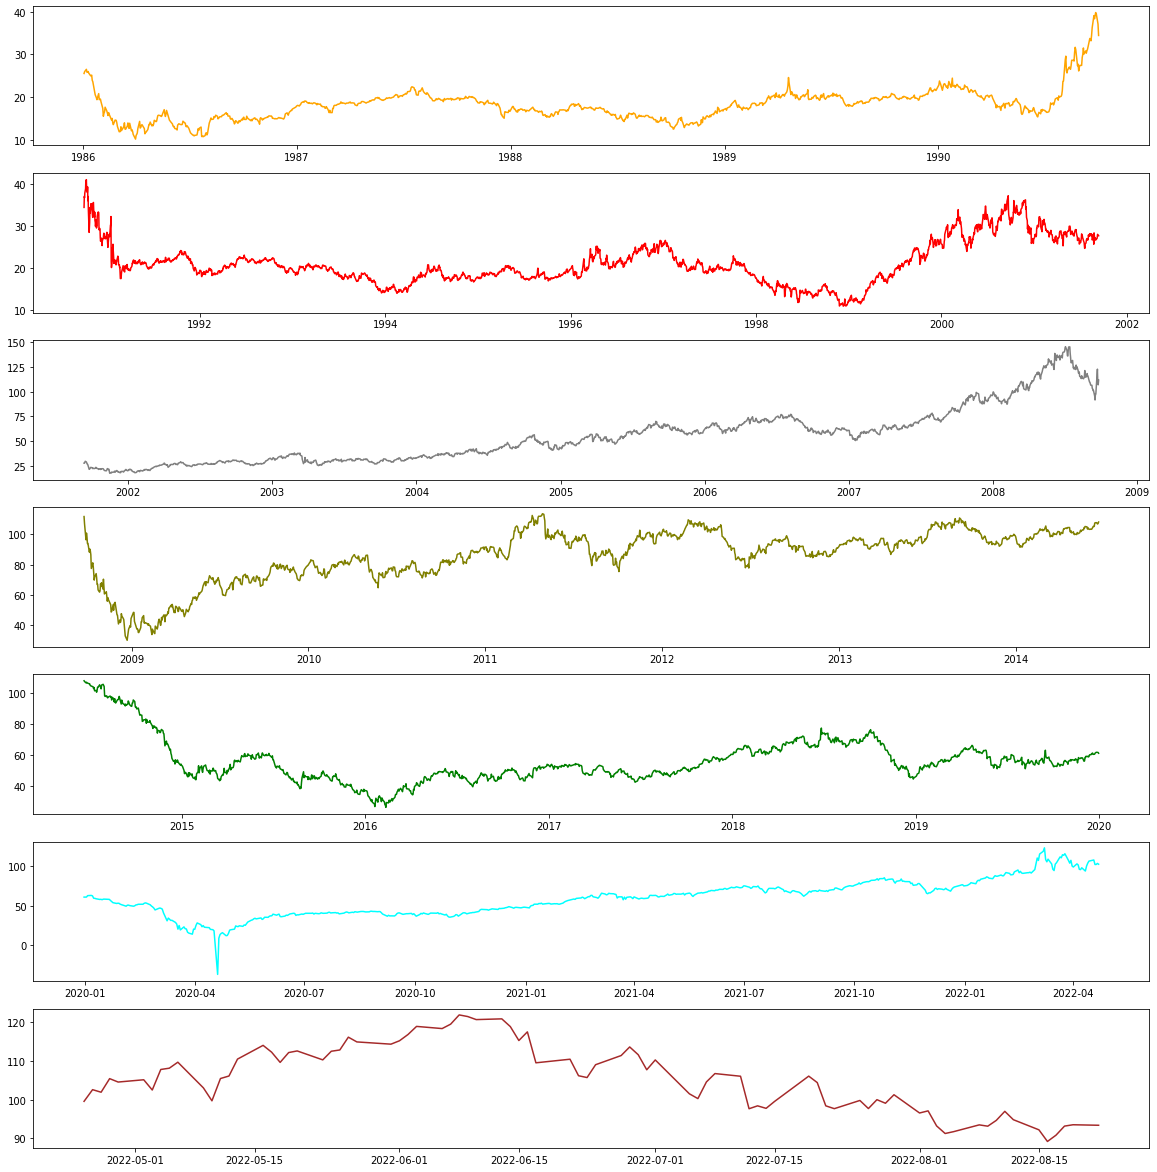

In [57]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, figsize=(20,21))
ax1.plot(data_wti[:gulf_war], color='orange')
ax2.plot(data_wti[gulf_war:attack_911], color='red')
ax3.plot(data_wti[attack_911:fina_crisis], color='gray')
ax4.plot(data_wti[fina_crisis:peak_shale], color='olive')
ax5.plot(data_wti[peak_shale:covid_19], color='green')
ax6.plot(data_wti[covid_19:war_rus_ukr], color='cyan')
ax7.plot(data_wti[war_rus_ukr:], color='brown')
plt.show()

In [58]:
data_wti.describe()

,Price
count,9232.000000
mean,45.661145
std,29.492842
min,-36.980000
25%,19.940000
50%,34.910000
75%,66.035000
max,145.310000


### Normal Distribution

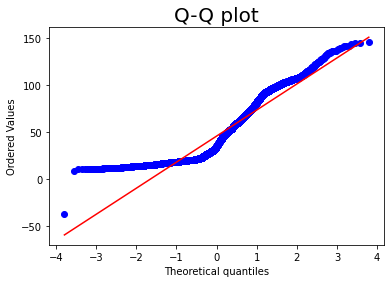

In [59]:
scipy.stats.probplot(data_wti.Price, plot=pylab)
plt.title('Q-Q plot', size=20)
pylab.show() 

In [60]:
data_wti.describe()

,Price
count,9232.000000
mean,45.661145
std,29.492842
min,-36.980000
25%,19.940000
50%,34.910000
75%,66.035000
max,145.310000


### Stationarity

In [61]:
# Determine p-value to determine if data is stationary
sts.adfuller(data_wti)

(-2.213377714641542,
 0.2014259950861617,
 38,
 9193,
 {'1%': -3.4310615334378807,
  '5%': -2.861854452413968,
  '10%': -2.5669373779569864},
 32747.08402618017)

### Seasonality

In [62]:
price_wti = data_wti.asfreq('B')
price_wti.isnull().sum()

Price    326
dtype: int64

In [63]:
price_wti = price_wti.fillna(value=price_wti.mean())
price_wti = price_wti[war_rus_ukr:]

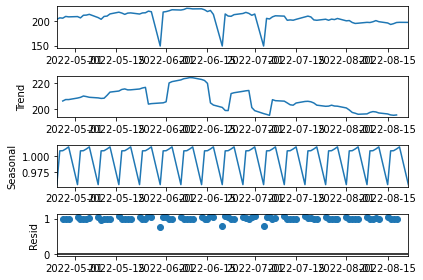

In [64]:
s_dec_multiplicative = seasonal_decompose((price_wti + price_wti.mean()), model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## Prices

### ACF

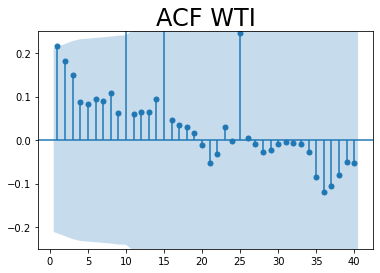

In [65]:
sgt.plot_acf(price_wti, lags=40, zero=False)
plt.title("ACF WTI", size = 24)
plt.ylim(-0.25, 0.25)
plt.show()

### PACF

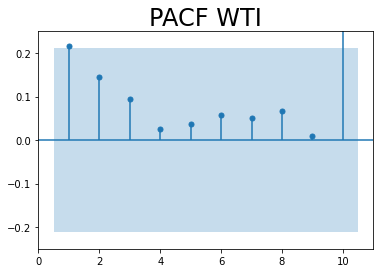

In [66]:
sgt.plot_pacf(price_wti.Price, lags = 10, zero = False, method = ('ols'))
plt.title("PACF WTI", size = 24)
plt.ylim(-0.25,0.25)
plt.show()

### Auto Regresive Modeling

In [67]:
model_ar_15 = ARIMA(price_wti.Price, order=(15,0,0))
results_ar_15 = model_ar_15.fit()
results_ar_15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   86
Model:                ARIMA(15, 0, 0)   Log Likelihood                -337.074
Date:                Sat, 24 Sep 2022   AIC                            708.149
Time:                        18:58:16   BIC                            749.873
Sample:                    04-25-2022   HQIC                           724.941
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.4698     14.362      7.065      0.000      73.321     129.619
ar.L1          0.1408      0.116      1.216      0.224      -0.086       0.368
ar.L2          0.0997      0.138      0.721      0.471      -0.171       0.371
ar.L3          0.0752      0.156      0.482      0.630      -0.231       0.381
ar.L4         -0.0014      0.216     -0.007      0.995      -0.425       0.422
ar.L5         -0.0609      0.161     -0.377      0.706      -0.377       0.255
ar.L6          0.0499      0.153      0.325      0.745      -0.251       0.351
ar.L7          0.0114      0.163      0.070      0.944      -0.307       0.330
ar.L8          0.0330      0.178      0.185      0.853      -0.316       0.382
ar.L9         -0.0294      0.238     -0.124      0.902      -0.497       0.438
ar.L10         0.2412      0.081      2.966      0.003       0.082       0.401
ar.L11        -0.0368      0.407     -0.090      0.928      -0.835       0.761
ar.L12        -0.0280      0.440     -0.064      0.949      -0.889       0.833
ar.L13        -0.0256      0.269     -0.095      0.924      -0.552       0.501
ar.L14         0.0306      0.274      0.112      0.911      -0.506       0.567
ar.L15         0.2888      0.080      3.605      0.000       0.132       0.446
sigma2       144.7032     15.593      9.280      0.000     114.141     175.266
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):               624.47
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                            -2.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Analysing the Residuals

In [68]:
price_wti['p_resid_ar_15'] = results_ar_15.resid

In [69]:
price_wti.p_resid_ar_15.mean(), price_wti.p_resid_ar_15.var()

(-0.28399232407649716, 146.6395564728969)

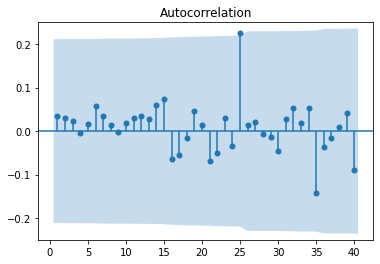

In [70]:
sgt.plot_acf(price_wti.p_resid_ar_15, zero=False, lags=40)
plt.ylim(-0.25,0.25)
plt.show()

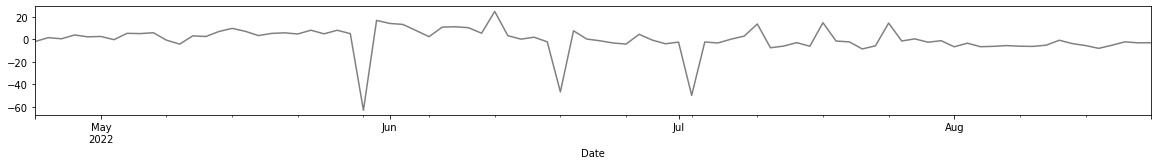

In [71]:
price_wti.p_resid_ar_15.plot(figsize=(20,2), color='grey');

### Auto Regresive Moving Average Modeling

In [72]:
model_ar_15_ma_3 = ARIMA(price_wti.Price, order=(15,0,3))
results_ar_15_ma_3 = model_ar_15_ma_3.fit()
results_ar_15_ma_3.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                   86
Model:                ARIMA(15, 0, 3)   Log Likelihood                -336.360
Date:                Sat, 24 Sep 2022   AIC                            712.720
Time:                        18:58:19   BIC                            761.807
Sample:                    04-25-2022   HQIC                           732.475
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.3565     12.990      7.879      0.000      76.896     127.817
ar.L1         -0.1344      0.719     -0.187      0.852      -1.544       1.276
ar.L2         -0.1044      0.805     -0.130      0.897      -1.683       1.474
ar.L3         -0.0562      0.983     -0.057      0.954      -1.982       1.870
ar.L4          0.0801      0.413      0.194      0.846      -0.730       0.890
ar.L5         -0.0221      0.230     -0.096      0.923      -0.472       0.428
ar.L6          0.0715      0.153      0.468      0.640      -0.228       0.371
ar.L7          0.0298      0.160      0.187      0.852      -0.283       0.343
ar.L8          0.0540      0.237      0.228      0.819      -0.410       0.518
ar.L9         -0.0063      0.360     -0.017      0.986      -0.712       0.700
ar.L10         0.2507      0.135      1.855      0.064      -0.014       0.516
ar.L11         0.0323      0.491      0.066      0.947      -0.929       0.994
ar.L12         0.0175      0.643      0.027      0.978      -1.242       1.277
ar.L13         0.0095      0.386      0.025      0.980      -0.747       0.766
ar.L14         0.0177      0.329      0.054      0.957      -0.626       0.662
ar.L15         0.3022      0.180      1.675      0.094      -0.051       0.656
ma.L1          0.3102      0.733      0.423      0.672      -1.127       1.747
ma.L2          0.2894      0.872      0.332      0.740      -1.419       1.998
ma.L3          0.2335      1.020      0.229      0.819      -1.765       2.232
sigma2       143.5347     19.641      7.308      0.000     105.039     182.031
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               593.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -2.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Analysing the Residuals

In [73]:
price_wti['p_resid_ar15_ma3'] = results_ar_15_ma_3.resid

In [74]:
price_wti.p_resid_ar15_ma3.mean(), price_wti.p_resid_ar15_ma3.var(),

(-0.2720012664518686, 143.92668339387401)

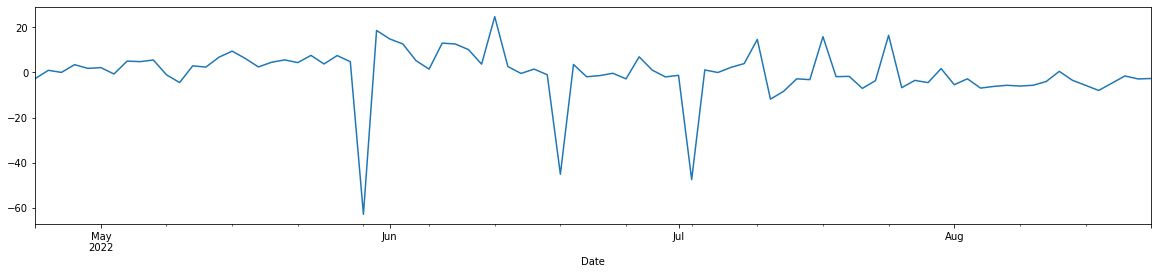

In [75]:
price_wti.p_resid_ar15_ma3.plot(figsize=(20,4));

## Returns

In [184]:
price_wti['p_returns'] = price_wti.Price.pct_change(1).mul(100)
price_wti = price_wti[1:]

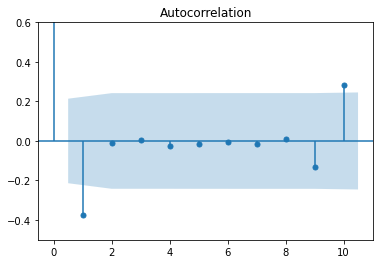

In [185]:
sgt.plot_acf(price_wti.p_returns, lags=10)
plt.ylim(-0.5,0.6)
plt.show()

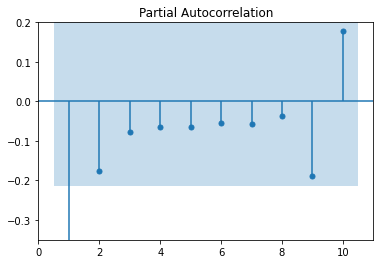

In [186]:
sgt.plot_pacf(price_wti.p_returns, lags = 10, zero = False, method = ('ols'))
plt.ylim(-0.35,0.2)
plt.show()

### Auto Regresive Modeling

In [187]:
model_ret_ar_5 = ARIMA(price_wti.p_returns, order=(5, 0, 0))
results_ret_ar_5 = model_ret_ar_5.fit()
results_ret_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              p_returns   No. Observations:                   84
Model:                 ARIMA(5, 0, 0)   Log Likelihood                -392.428
Date:                Sat, 24 Sep 2022   AIC                            798.857
Time:                        20:55:26   BIC                            815.873
Sample:                    04-27-2022   HQIC                           805.697
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9050      2.766      1.050      0.294      -2.517       8.327
ar.L1         -0.4571      0.085     -5.400      0.000      -0.623      -0.291
ar.L2         -0.2248      0.195     -1.153      0.249      -0.607       0.157
ar.L3         -0.1176      0.366     -0.321      0.748      -0.835       0.600
ar.L4         -0.0907      0.496     -0.183      0.855      -1.062       0.881
ar.L5         -0.0599      0.469     -0.128      0.898      -0.980       0.860
sigma2       666.8451     74.441      8.958      0.000     520.944     812.746
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               365.36
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                             2.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Analyzing Residuals of Returns

In [188]:
price_wti['p_ret_resid_ar_5'] = results_ret_ar_5.resid

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19816\564949535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_wti['p_ret_resid_ar_5'] = results_ret_ar_5.resid


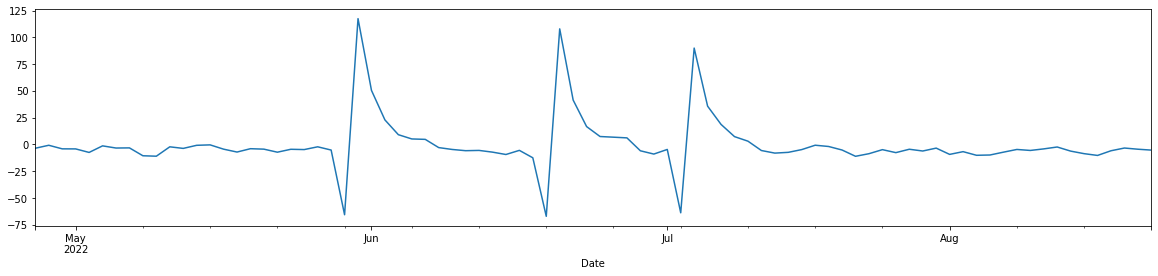

In [189]:
price_wti.p_ret_resid_ar_5.plot(figsize=(20,4));

In [190]:
price_wti.p_ret_resid_ar_5.mean(), price_wti.p_ret_resid_ar_5.var()

(-0.04777166999207677, 674.9117698173915)

### Auto Regresive Moving Average Modeling

In [191]:
model_ret_ar5_ma5 = ARIMA(price_wti.p_returns, order=(5,0,5))
results_ret_ar5_ma5 = model_ret_ar5_ma5.fit()
results_ret_ar5_ma5.summary()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              p_returns   No. Observations:                   84
Model:                 ARIMA(5, 0, 5)   Log Likelihood                -389.850
Date:                Sat, 24 Sep 2022   AIC                            803.700
Time:                        20:55:27   BIC                            832.870
Sample:                    04-27-2022   HQIC                           815.426
                         - 08-22-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7147      1.142      3.254      0.001       1.477       5.952
ar.L1          0.1123      0.295      0.381      0.703      -0.466       0.690
ar.L2         -0.1277      0.328     -0.389      0.697      -0.770       0.515
ar.L3          0.0651      0.262      0.249      0.804      -0.448       0.579
ar.L4         -0.3516      0.187     -1.877      0.060      -0.719       0.015
ar.L5          0.6534      0.212      3.084      0.002       0.238       1.069
ma.L1         -0.4606     15.396     -0.030      0.976     -30.636      29.715
ma.L2          0.1220      8.139      0.015      0.988     -15.830      16.074
ma.L3         -0.1913      9.955     -0.019      0.985     -19.703      19.320
ma.L4          0.4787      8.377      0.057      0.954     -15.939      16.897
ma.L5         -0.9480     14.258     -0.066      0.947     -28.894      26.998
sigma2       601.8703   8987.302      0.067      0.947    -1.7e+04    1.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):               359.83
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             2.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Returns vs. Predictions

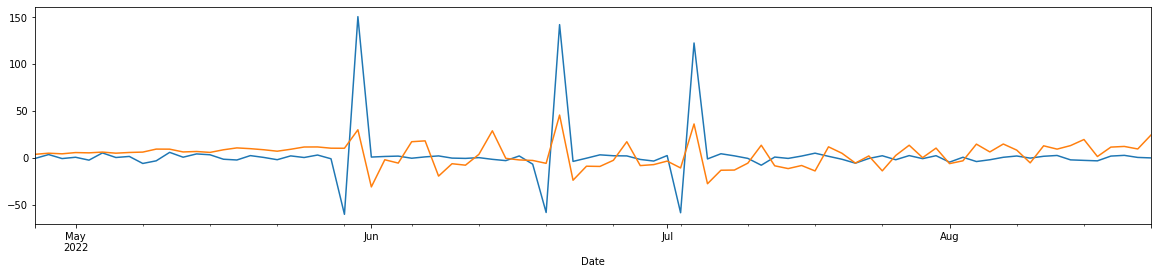

In [192]:
price_wti.p_returns.plot(figsize=(20,4))
results_ret_ar5_ma5.predict().plot(figsize=(20,4))
plt.show()

#### Analyzing ARMA Residuals

In [193]:
price_wti['p_ret_resid_ar5_ma5'] = results_ret_ar5_ma5.resid

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19816\290264532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_wti['p_ret_resid_ar5_ma5'] = results_ret_ar5_ma5.resid


In [194]:
price_wti.p_ret_resid_ar5_ma5.mean(), price_wti.p_ret_resid_ar5_ma5.var()

(-0.6779254212785555, 630.1272494270139)

## Auto-ARIMA Modeling

### Prices

In [265]:
mod_auar_wti = auto_arima(price_wti.Price, m=10, max_p=10, max_q=10, max_P=10, max_Q=10, trend='ct')

In [266]:
results_auar_wti = mod_auar_wti.fit(price_wti.Price)
results_auar_wti.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   84
Model:             SARIMAX(3, 1, 0)x(0, 0, [1], 10)   Log Likelihood                -337.583
Date:                              Sat, 24 Sep 2022   AIC                            689.166
Time:                                      21:37:06   BIC                            706.098
Sample:                                           0   HQIC                           695.968
                                               - 84                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4768      8.088      0.059      0.953     -15.375      16.329
drift         -0.0172      0.194     -0.089      0.929      -0.398       0.364
ar.L1         -0.6544      0.087     -7.523      0.000      -0.825      -0.484
ar.L2         -0.3940      0.117     -3.369      0.001      -0.623      -0.165
ar.L3         -0.1603      0.114     -1.406      0.160      -0.384       0.063
ma.S.L10       0.2345      0.066      3.555      0.000       0.105       0.364
sigma2       197.0902     19.539     10.087      0.000     158.795     235.385
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               797.83
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                            -3.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [267]:
wti_pred = results_auar_wti.predict(n_periods=20)

In [282]:
wti_test = wti_last_month.rename(columns={'DATE':'Date', 'DCOILWTICO':'Price'})
wti_test = wti_test.set_index('Date')
wti_test = wti_test[train_date:]

In [283]:
wti_test.replace('.',np.nan, inplace=True)

In [284]:
wti_test.fillna(method='ffill', inplace=True)

In [285]:
wti_test = wti_test[1:]
wti_test = pd.DataFrame(wti_test.Price.astype('float'))

In [286]:
wti_test['P_pred'] = wti_pred

In [287]:
wti_test['Sqrt_Error'] = np.exp2(wti_test.Price - wti_test.P_pred)

In [288]:
wti_test.Sqrt_Error.mean()

7.078990457423741

### Returns

In [289]:
mod_auar_r = auto_arima(price_wti.p_returns, m=15, max_p=15, max_q=15, max_P=15, max_Q=15, trend='ct')

In [290]:
results_auar_r = mod_auar_r.fit(price_wti.p_returns)
results_auar_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   84
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 15)   Log Likelihood                -387.855
Date:                            Sat, 24 Sep 2022   AIC                            785.710
Time:                                    21:39:15   BIC                            797.864
Sample:                                         0   HQIC                           790.596
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4033      7.764      0.438      0.661     -11.814      18.621
drift         -0.0187      0.165     -0.113      0.910      -0.342       0.305
ma.L1         -0.4568      0.069     -6.624      0.000      -0.592      -0.322
ma.S.L15       0.3494      0.065      5.349      0.000       0.221       0.477
sigma2       584.4825     62.699      9.322      0.000     461.595     707.370
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               356.07
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             2.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [291]:
wti_r_pred = mod_auar_r.predict(n_periods=19)

In [292]:
wti_test['ret_pred']= np.insert(wti_r_pred,0,1)

In [293]:
wti_test.fillna(1,inplace=True)

In [322]:
P_Ret_Pred = []

for i in range(19):
    P_Ret_Pred.append(wti_test.Price.iloc[i] * (1 + (wti_test.ret_pred.iloc[i+1]/100)))
    

In [327]:
wti_test['P_Ret_Pred'] = np.insert(P_Ret_Pred,0,1)

In [340]:
wti_test['Sqrt_R_Error'] = (wti_test.Price - wti_test.P_Ret_Pred)*(wti_test.Price - wti_test.P_Ret_Pred)

In [343]:
wti_test.Sqrt_R_Error[1:].mean()

13.562533310954722

In [344]:
wti_test

,Price,P_pred,Sqrt_Error,ret_pred,P_Ret_Pred,Sqrt_R_Error
Date,,,,,,
2022-08-23,96.46,92.331755,17.487409,1.000000,1.000000,9112.611600
2022-08-24,95.52,92.533643,7.924703,5.477750,101.743837,38.736151
2022-08-25,93.33,92.782639,1.461410,-0.351581,95.184170,3.437945
2022-08-26,93.63,91.718406,3.762246,0.586392,93.877280,0.061147
2022-08-29,97.40,91.148084,76.210375,1.348273,94.892388,6.288117
2022-08-30,92.08,89.942742,4.399250,1.430280,98.793092,45.065609
2022-08-31,90.09,90.101615,0.991981,0.978091,92.980626,8.355721
2022-09-01,87.09,90.245550,0.112224,1.864013,91.769289,21.895747
2022-09-02,87.29,89.864825,0.167842,2.640645,89.389738,4.408898
